In [42]:
import sys,os,os.path
sys.path.append(os.path.expanduser('~/Codes/SolutionDistillation'))
import numpy as np
import tensorflow as tf
import os
from distill.common.hparams import TransformerHparam, LSTMHparam
from distill.data_util.prep_algorithmic import AlgorithmicIdentityDecimal40, AlgorithmicAdditionDecimal40, \
  AlgorithmicMultiplicationDecimal40, AlgorithmicSortProblem, AlgorithmicReverseProblem, AlgorithmicIdentityBinary40
from distill.data_util.prep_arithmatic import Arithmatic, ArithmaticSimpleSameLength10, ArithmaticSimpleSameLength21Depth2Zipfian, \
ArithmaticSimpleSameLength21Depth2Normal, ArithmaticSimpleSameLength201Depth2Normal, ArithmaticSimpleSameLength21Depth2NormalBiLing
from distill.data_util.prep_imdb import IMDB
from distill.data_util.prep_ptb import PTB, SentWiki
from distill.data_util.prep_sst import SST
from distill.data_util.prep_wsj_parsing import ParseWSJ
from distill.models.lstm_seq2seq import LSTMSeq2Seq, BidiLSTMSeq2Seq
from distill.models.transformer import Transformer, UniversalTransformer, EncodingTransformer, \
  EncodingUniversalTransformer
from distill.pipelines.seq2seq import Seq2SeqTrainer
from distill.models.transformer import Transformer, UniversalTransformer, EncodingTransformer, \
  EncodingUniversalTransformer
from distill.pipelines.distill_pipelines import Seq2SeqDistiller
from distill.pipelines.seq2seq import Seq2SeqTrainer
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline  

# Enable TF Eager execution
tfe = tf.contrib.eager
tfe.enable_eager_execution()

# Other setup
Modes = tf.estimator.ModeKeys

In [43]:
def get_stats_from_examples(batched_examples):
    lengthes = []
    targets = []
    for example_inputs, example_targets in zip(batched_examples[0], batched_examples[1]):
        np_example_inputs = example_inputs.numpy()
        np_example_targets = example_targets.numpy()[0]
        if 0 in list(np_example_inputs):
            length = list(np_example_inputs).index(0)
        else:
            length = len(np_example_inputs)
        lengthes.append(length)
        targets.append(np_example_targets)
    return lengthes, targets

In [50]:
#task = PTB('../data/ptb')
task = SentWiki('../data/sent_wiki')

In [51]:

train_dataset = tf.data.TFRecordDataset(task.get_tfrecord_path(mode="train"))
train_dataset = train_dataset.map(task.parse_examples)
train_dataset = train_dataset.apply(tf.data.experimental.bucket_by_sequence_length(element_length_func=lambda x1,x2,x3,x4: tf.size(x1),
                                                                                   bucket_batch_sizes=[1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000], bucket_boundaries=[10,20,30,40,50,60,70,80, 90, 100],padded_shapes=task.get_padded_shapes()))
train_dataset = train_dataset.shuffle(buffer_size=100)
train_dataset = train_dataset.repeat()



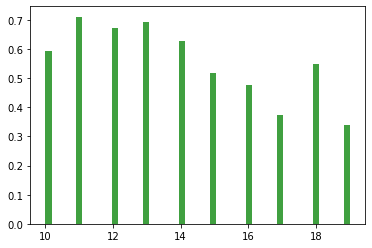

In [69]:
train_examples = tfe.Iterator(train_dataset).next()

lengthes, targets = get_stats_from_examples(train_examples)
n, bins, patches = plt.hist(lengthes, 50, density=True, facecolor='g', alpha=0.75)
plt.show()

In [66]:
i = np.random.randint(len(train_examples[0]))
print(i, len(train_examples[0]), len(train_examples[1]))
example_inputs, example_targets = list(zip(train_examples[0], train_examples[1]))[i]
print(' '.join(task.decode(example_inputs.numpy(), task.id2word)).replace('<pad>',''))
print(' '.join(task.decode(example_targets.numpy(), task.id2word)).replace('<pad>',''))

759 1000 1000
<s> this often gives the combined advantage of name recognition and more control over one s music . 
this often gives the combined advantage of name recognition and more control over one s music . <eos> 


In [67]:
print("total number of vocab:", len(task.word2id))

total number of vocab: 9920
